## Sales Prediction (Simple Linear Regression using OLS)
**step by step process**

# 1. Understanding business needs

Problem Statement
-------------------------------
Build a model which predicts sales based on the money spent on different platforms for marketing.

# 2. Reading and understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_31476\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
advertising = pd.DataFrame(pd.read_csv("datasets/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


data inspection

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# 3. Data Cleaning

In [6]:
#check null values
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Outlier analysis

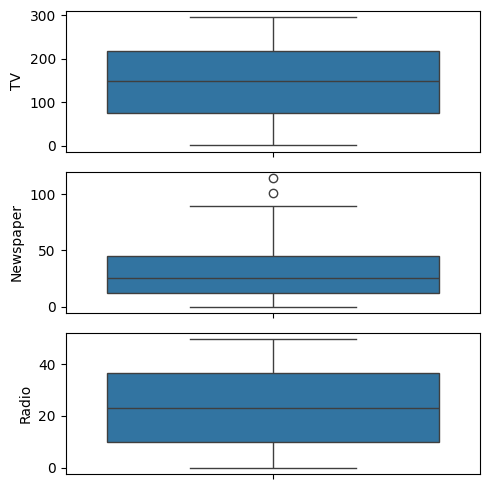

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

# 4. EDA

Univeriate Analysis

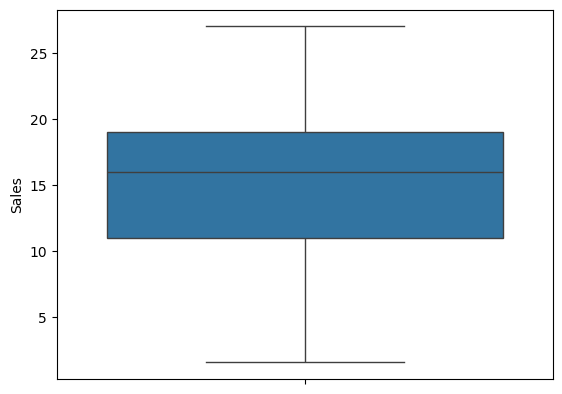

In [8]:
sns.boxplot(advertising['Sales'])
plt.show()

Multivariate analysis

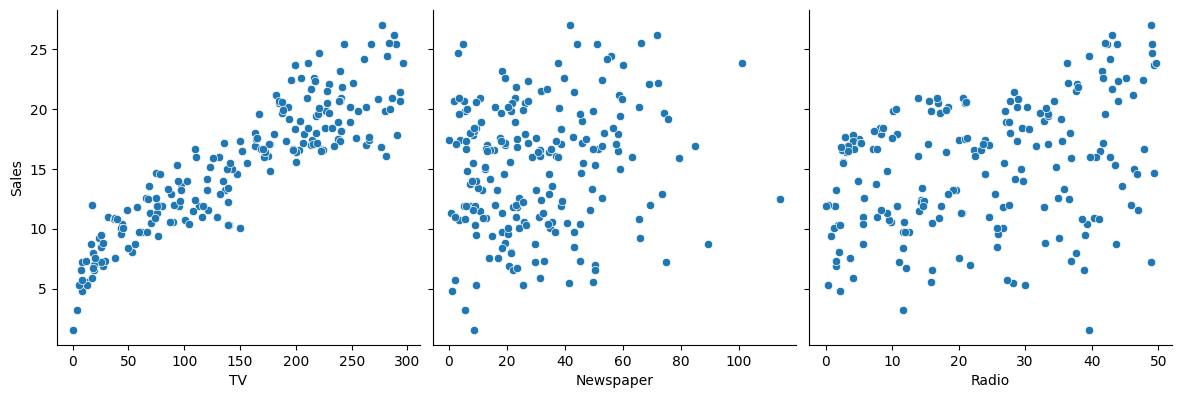

In [9]:
# how Sales are related with other variables
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

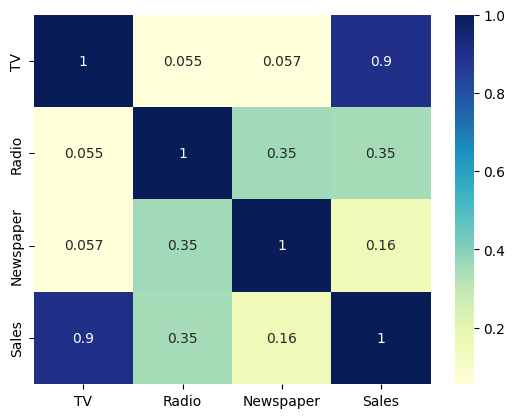

In [10]:
# correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

Insights:

from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

# 5. Feature Selection

from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform **simple linear regression** using **TV as our feature variable.**

# 6. Model Building

**Simple Linear Regression**

y=c+m×TV

m values are called the model coefficients or model parameters.

split feature and target variable

In [11]:
X = advertising['TV']
y = advertising['Sales']

train test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_train.head()

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [14]:
y_train.head()

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

Building linear model using **OLS**

In [15]:
import statsmodels.api as sm

**note:**

By default, the statsmodels library fits a line on the dataset which passes through the origin. 

But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. 

And once we have added the constant to your X_train dataset, we can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels

In [16]:
# add constant (intercept)
X_train_sm = sm.add_constant(X_train)

fit the regression line using **'OLS'**

In [17]:
model = sm.OLS(y_train, X_train_sm).fit()

print model parameters

In [18]:
#  the intercept and the slope of the regression line fitted
model.params

const    7.206555
TV       0.054835
dtype: float64

In [19]:
c = model.params[0]
m = model.params[1]
print(c,m)

7.206554548173248 0.05483488379527945


C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_31476\1115548353.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = model.params[0]
C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_31476\1115548353.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = model.params[1]


**OLS SUMMARY TABLE**

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           5.08e-50
Time:                        09:29:21   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

**Insights:**

The values we are concerned with -

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

**1. The coefficient for TV is 0.054, with a very low p value**

The coefficient is statistically significant. So the association is not purely by chance.

higher p value - accept H0 - x and y are not related

lower p value - reject H0 - x and y are related

**2. R - squared is 0.816**

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

**3. F statistic has a very low p value (practically low)**

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

**Visualization**

From the parameters that we get, our linear regression equation becomes:

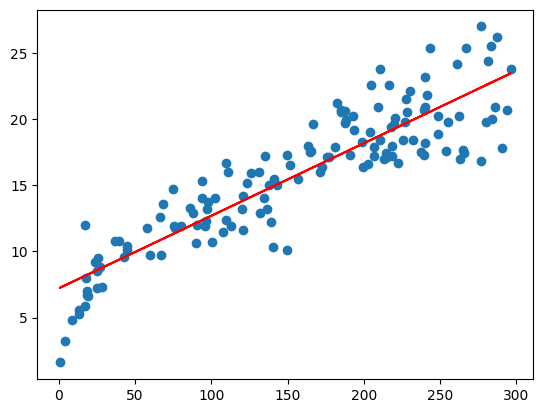

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, c + m*X_train, 'r')
plt.show()

# 7. Hyperparameter Tuning
* manual search
* grid search 
* randomized search
* bayesian optimization
,etc

to be done.....

# 8. Model Evaluation

Distribution of the error terms


We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [22]:
y_train_pred = model.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_31476\1045377869.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


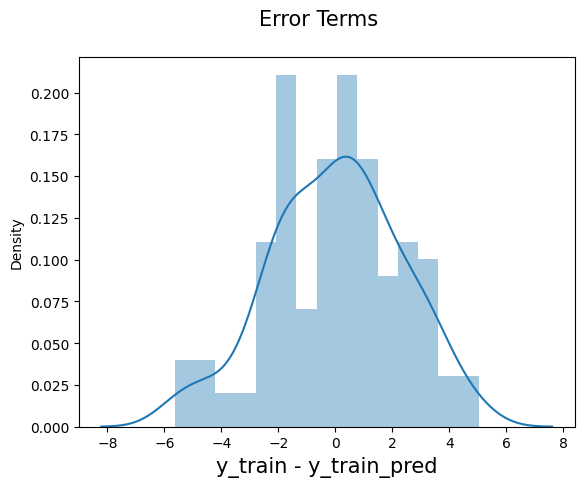

In [23]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

The residuals are following the normally distributed with a mean 0. 

**Finding Train score and Test score**

Comparing train and test score to identify if the model is overfitting or underfitting

In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

predictions = model.predict(X_test_sm)

In [25]:
#  FOR TRAIN SCORE 
#  -----------------------------------------------------------------

from sklearn.metrics import mean_absolute_error
MAE1 = mean_absolute_error(y_train, y_train_pred)

from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(y_train, y_train_pred)

RMSE1 = mean_squared_error(y_train, y_train_pred, squared = False)

from sklearn.metrics import r2_score
R2_1 = r2_score(y_train, y_train_pred)

def adjusted_r2_score(actual, predictions, num_pred, num_samples):
    n = num_samples
    k = num_pred
    r2 = r2_score(actual, predictions)
    adjusted_r2 = 1 - ((1-r2) * ((n-1)/(n-k-1)))
    return adjusted_r2

num_samples = X_test.shape[0]
num_predictors = 1
adj_R2_1 = adjusted_r2_score(y_train, y_train_pred, num_predictors, num_samples)



C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
#  FOR TEST SCORE 
#  -----------------------------------------------------------------

from sklearn.metrics import mean_absolute_error
MAE2 = mean_absolute_error(y_test, predictions)

from sklearn.metrics import mean_squared_error
MSE2 = mean_squared_error(y_test, predictions)

RMSE2 = mean_squared_error(y_test, predictions, squared = False)

from sklearn.metrics import r2_score
R2_2 = r2_score(y_test, predictions)

def adjusted_r2_score(actual, predictions, num_pred, num_samples):
    n = num_samples
    k = num_pred
    r2 = r2_score(actual, predictions)
    adjusted_r2 = 1 - ((1-r2) * ((n-1)/(n-k-1)))
    return adjusted_r2

num_samples = X_test.shape[0]
num_predictors = 1
adj_R2_2 = adjusted_r2_score(y_test, predictions, num_predictors, num_samples)



C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
# COMPARISION OF TRAIN SCORE AND TEST SCORE
# -----------------------------------------------------

performance_df = pd.DataFrame({
    'train score': (MAE1,MSE1,RMSE1,R2_1,adj_R2_1),
    'test score': (MAE2,MSE2,RMSE2,R2_2,adj_R2_2)
}, index=['MAE', 'MSE', 'RMSE', 'R2', 'ADJ_R2'])
performance_df 

,train score,test score
MAE,1.846146,1.806912
MSE,5.265926,5.179525
RMSE,2.294761,2.275857
R2,0.799627,0.814855
ADJ_R2,0.796172,0.811663


Insights:

train scores and test scores are almost same

Hence the model is a **good fit** for the data.

# 9. Prediction for test set

In [28]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

y_pred = model.predict(X_test_sm)

In [29]:
y_pred.head()

95     16.161091
15     17.921291
30     23.267692
158     7.848123
128    19.286679
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 2.27585706980176


In [32]:
r_squared = r2_score(y_test, y_pred)
print("R2:",r_squared)

R2: 0.814855389208679


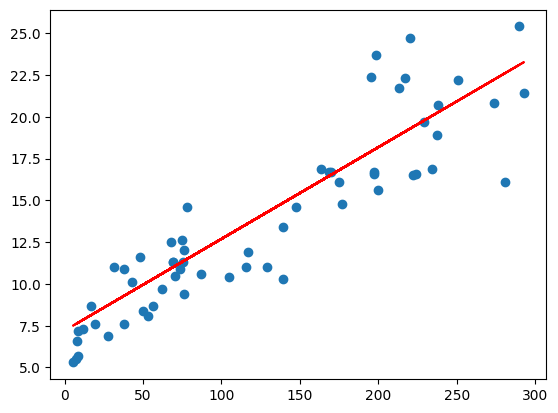

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, c + m * X_test, 'r')
plt.show()